# Detecting and Treating Outliers | Treating the odd one out!

## Introduction
One of the most important steps as part of data preprocessing is detecting and treating the outliers as they can negatively affect the statistical analysis and the training process of a machine learning algorithm resulting in lower accuracy. 

### What are Outliers?
Outliers are those data points that are significantly different from the rest of the dataset. They are often abnormal observations that skew the data distribution, and arise due to inconsistent data entry, or erroneous observations.

### What is the purpose of detecting outliers?
To identify data points that may impact the analysis or model performance

### How should you handle outliers?
To handle outliers effectively, analysts should identify them through visualization or statistical methods, evaluate their impact on analysis, and apply appropriate techniques like trimming, transformation, or exclusion to mitigate their influence.

### What is the purpose of treating outliers?
To improve the accuracy and reliability of statistical analyses or machine learning models

### How do researchers handle outliers?
Researchers address outliers by first detecting them using various statistical or data visualization tools. Subsequently, they evaluate the necessity of outlier treatment based on the research objectives. This can be done by employing techniques such as winsorization, transformation, or data stratification when required.

# Detecting Outliers
If our dataset is small, we can detect the outlier by just looking at the dataset. But what if we have a huge dataset, how do we identify the outliers then? We need to use visualization and mathematical techniques.

Below are some of the techniques of detecting outliers

<li> Boxplots
<li> Z-score
<li> Inter Quantile Range(IQR)

### import the necessary modules

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Box plot method

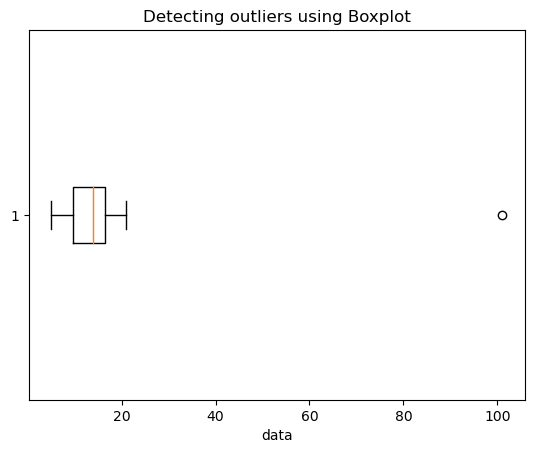

In [22]:
data= [15, 101, 18, 7, 13, 16, 11, 21, 5, 15, 10, 9]
plt.boxplot(data, vert=False)
plt.title("Detecting outliers using Boxplot")
plt.xlabel('data')
plt.show()

## 2. Z-score Method

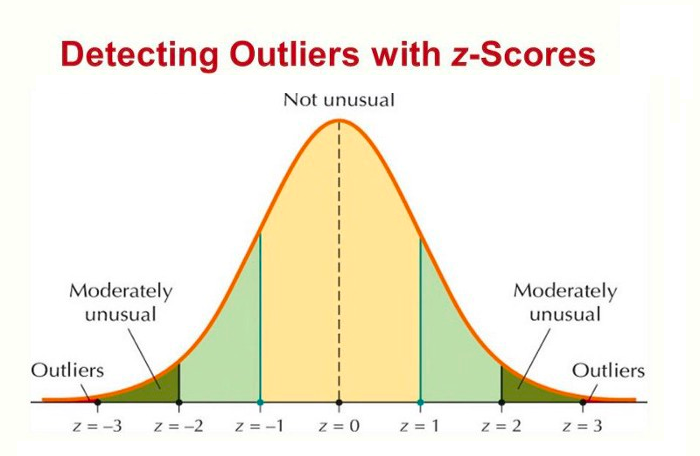
#### Criteria: any data point whose Z-score falls out of 3rd standard deviation is an outlier.

### Steps
<li> Loop through all the data points and compute the Z-score using the formula (Xi-mean)/std.
<li> define a threshold value of 3 and mark the datapoints whose absolute value of Z-score is greater than the threshold as outliers.

In [24]:
data= [15, 101, 18, 7, 13, 16, 11, 21, 5, 15, 10, 9]
outliers = []
thres = 3
mean = np.mean(data)
std = np.std(data)
    
for i in data:
    z_score = (i-mean)/std
    if (np.abs(z_score) > thres):
        outliers.append(i)
print('Mean=',mean, 'Standard deviation=',std)   
print("Outliers from Z-scores method: ", outliers)

Mean= 20.083333333333332 Standard deviation= 24.794012494059036
Outliers from Z-scores method:  [101]


## 3. Inter Quantile Range(IQR) Method

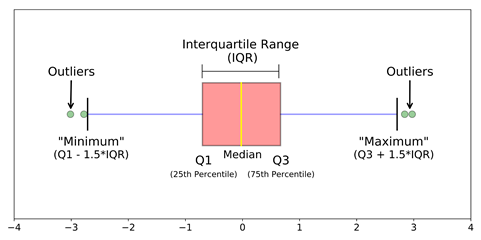
#### Criteria: data points that lie 1.5 times of IQR above Q3 and below Q1 are outliers. 

### Steps
<li> Sort the dataset in ascending order
<li> calculate the 1st and 3rd quartiles(Q1, Q3)
<li> compute IQR=Q3-Q1
<li> compute lower bound = (Q1–1.5*IQR) and upper bound = (Q3+1.5*IQR)
<li> loop through the values of the dataset and check for those who fall below the lower bound and above the upper bound and mark them as outliers

In [29]:
data= [15, 101, 18, 7, 13, 16, 11, 21, 5, 15, 10, 9]
outliers = []
data = sorted(data)
q1 = np.percentile(data, 25)
q3 = np.percentile(data, 75)
IQR = q3-q1
lwr_bound = q1-(1.5*IQR)
upr_bound = q3+(1.5*IQR)
for i in data: 
    if (i<lwr_bound or i>upr_bound):
        outliers.append(i)
print('q1=',q1, 'q3=',q3, 'IQR=',IQR)
print('Lower and Upper bounds are',lwr_bound, upr_bound)
print("Outliers from IQR method: ", outliers)

q1= 9.75 q3= 16.5 IQR= 6.75
Lower and Upper bounds are -0.375 26.625
Outliers from IQR method:  [101]


# How to Handle Outliers?
### Below are some of the methods of treating the outliers:

## Step 1: Trimming/Remove the outliers
In this technique, we remove the outliers from the dataset. Although it is not a good practice to follow.

### Python code to delete the outlier and copy the rest of the elements to another array.

In [33]:
# Trimming for i in sample_outliers:     
a = np.delete(sample, np.where(sample==i)) 
print(a) # print(len(sample), len(a))

[ 15 101  18   7  13  16  11  21   5  15  10   9]


In [34]:
import numpy as np

# Given data
data = np.array([15, 101, 18, 7, 13, 16, 11, 21, 5, 15, 10, 9])

# Calculate the Z-scores of the data
z_scores = (data - np.mean(data)) / np.std(data)

# Create a boolean mask for data points that are not outliers
mask = (z_scores >= -3) & (z_scores <= 3)

# Apply the mask to the data to get data without outliers
data_without_outliers = data[mask]

print(f"Data without outliers: {data_without_outliers}")


Data without outliers: [15 18  7 13 16 11 21  5 15 10  9]


## Step 2: Quantile Based Flooring and Capping
In this technique, the outlier is capped at a certain value above the 90th percentile value or floored at a factor below the 10th percentile value. Python code to delete the outlier and copy the rest of the elements to another array.

In [35]:
# Computing 10th, 90th percentiles and replacing the outliers 
tenth_percentile = np.percentile(data, 10) 
ninetieth_percentile = np.percentile(data, 90) 

# print(tenth_percentile, ninetieth_percentile)
b = np.where(data<tenth_percentile, tenth_percentile, data) 
b = np.where(b>ninetieth_percentile, ninetieth_percentile, b) 
print("data:", data) 
print("New array:",b)

data: [ 15 101  18   7  13  16  11  21   5  15  10   9]
New array: [15.  20.7 18.   7.2 13.  16.  11.  20.7  7.2 15.  10.   9. ]


The data points that are lesser than the 10th percentile are replaced with the 10th percentile value and the data points that are greater than the 90th percentile are replaced with 90th percentile value.

## Step 3: Mean/Median Imputation
As the mean value is highly influenced by the outliers, it is advised to replace the outliers with the median value.

In [38]:
median = np.median(data)
median

14.0

In [40]:
# Replace with median for i in sample_outliers:    
c = np.where(data==i, 14, data) 
print("Original Data: ", data) 
print("New array: ",c) 
# print(c.dtype)

Original Data:  [ 15 101  18   7  13  16  11  21   5  15  10   9]
New array:  [15 14 18  7 13 16 11 21  5 15 10  9]


## Step 4: Visualizing the Data after Treating the Outlier

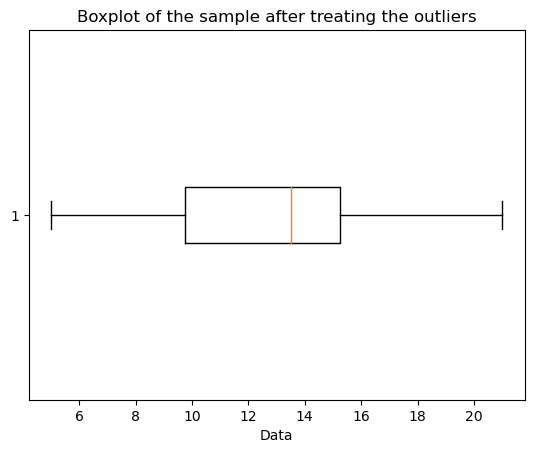

In [42]:
plt.boxplot(c, vert=False)
plt.title("Boxplot of the sample after treating the outliers")
plt.xlabel("Data")
plt.show()

## Conclusion
In conclusion, identifying and addressing outliers is paramount in data analysis. These data anomalies can skew results, leading to inaccurate insights and decisions. By employing robust detection techniques and thoughtful treatment strategies, we can enhance the integrity of our analyses and unlock hidden patterns within our data. Outliers, once understood and managed, become valuable sources of information, ultimately contributing to more informed and reliable decision-making processes.

In [ ]:
import seaborn as sns
sns.boxplot(x=df['column_name'])

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(df['feature1'], df['feature2'])

In [ ]:
from scipy import stats
z_scores = stats.zscore(df['column_name'])
outliers = df[abs(z_scores) > 3]

In [ ]:
Q1 = df['column_name'].quantile(0.25)
Q3 = df['column_name'].quantile(0.75)
IQR = Q3 - Q1
outliers = df[(df['column_name'] < Q1 - 1.5 * IQR) | (df['column_name'] > Q3 + 1.5 * IQR)]

In [ ]:
df_no_outliers = df[~df['column_name'].isin(outliers['column_name'])]

In [ ]:
df['column_name'] = np.log1p(df['column_name'])

In [ ]:
from scipy.stats.mstats import winsorize
df['column_name'] = winsorize(df['column_name'], limits=[0.05, 0.05])